In [2]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img,img_to_array
from tensorflow.keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
Total params: 1,792
Trainable params: 1,792
Non-trainable params: 0
_________________________________________________________________
None


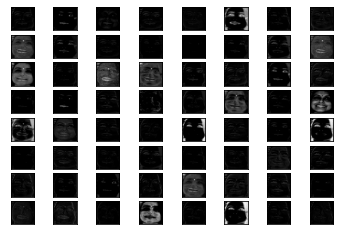

In [4]:
# plot feature map of first conv layer for given image
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Model
from matplotlib import pyplot
from numpy import expand_dims
# load the model
model = VGG16()
# redefine model to output right after the first hidden layer
model = Model(inputs=model.inputs, outputs=model.layers[1].output)
print(model.summary())
# load the image with the required shape
img = load_img('/Users/vatsal/Face/Bag-of-Visual-Words-Python-master/Rani_Mukerji/0_1.jpg', target_size=(224, 224))
# convert the image to an array
img = img_to_array(img)
# expand dimensions so that it represents a single 'sample'
img = expand_dims(img, axis=0)
# prepare the image (e.g. scale pixel values for the vgg)
img = preprocess_input(img)
# get feature map for first hidden layer
feature_maps = model.predict(img)
# plot all 64 maps in an 8x8 squares
square = 8
ix = 1
for _ in range(square):
    for _ in range(square):
        # specify subplot and turn of axis
        ax = pyplot.subplot(square, square, ix)
        ax.set_xticks([])
        ax.set_yticks([])
        # plot filter channel in grayscale
        pyplot.imshow(feature_maps[0, :, :, ix-1],cmap='gray')
        arr1=feature_maps[0,:,:,ix-1]
        ix += 1
# show the figure
pyplot.show()

In [5]:
arr1

array([[ 24.125599,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       [ 96.471054,  17.949028,  20.174202, ...,   0.      ,   0.      ,
          0.      ],
       [ 93.352554,  12.244277,  13.47343 , ...,   0.      ,   0.      ,
          0.      ],
       ...,
       [128.49774 ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       [127.24296 ,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ],
       [ 67.579956,   0.      ,   0.      , ...,   0.      ,   0.      ,
          0.      ]], dtype=float32)

In [8]:
import pandas as pd
ftv=pd.DataFrame(arr1)
ftv.to_csv("Vatsal.csv")